<a href="https://colab.research.google.com/github/afirsta15/DuniaGunung/blob/master/rakamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link = 'https://drive.google.com/file/d/1sLirBBe2T2OyjBPcGdAGcsVu2ASlalrB/view?usp=sharing' # The shareable link

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

sharing


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
root_path = '/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv'  #change dir to your project folder

In [ ]:
import pandas as pd
df = pd.read_csv ('/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv')
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [7]:
df = pd.read_csv ('/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv')
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [9]:
df.nunique()

Unnamed: 0          466285
id                  466285
member_id           466285
loan_amnt             1352
funded_amnt           1354
                     ...  
all_util                 0
total_rev_hi_lim     14612
inq_fi                   0
total_cu_tl              0
inq_last_12m             0
Length: 75, dtype: int64

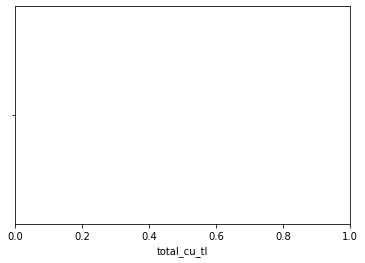

In [14]:
plt.figure()
sns.boxplot(x=df['total_cu_tl'])
plt.show()

In [15]:
%%capture
!gdown --id 1xKW5T0AVw8ZdouNxQ6vImwS5TyiLecEu -O '/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv'

In [18]:
%reset -f
import pandas as pd
import numpy as np

filename = '/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv' #Write the filename of the original data set
df = pd.read_csv(filename, low_memory=False)
col_names = df.columns.tolist()
print(col_names)
print('Number of attributes: ' + str(len(col_names)))

['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_

In [19]:
df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq', 'total_acc']]
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,4 years,MORTGAGE,110000.0,19.85,0.0,NaN,36.0
466281,22000,22000,22000.0,60 months,19.97,582.50,10+ years,MORTGAGE,78000.0,18.45,0.0,NaN,30.0
466282,20700,20700,20700.0,60 months,16.99,514.34,7 years,MORTGAGE,46000.0,25.65,0.0,65.0,43.0
466283,2000,2000,2000.0,36 months,7.90,62.59,3 years,OWN,83000.0,5.39,3.0,13.0,27.0


Larger deviation: 8079
Total: 458206


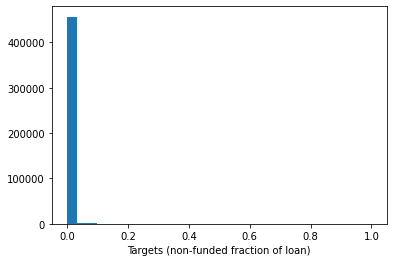

In [20]:
%matplotlib inline
loan = df['loan_amnt'].values
funded = df['funded_amnt_inv'].values
targets = np.abs(loan-funded)/loan #non-funded fraction of loan: 0: fully funded, 1: 0% funded

df['targets'] = targets
wrk_records = np.where(~np.isnan(targets))
y = targets[wrk_records]>=0.05

import matplotlib.pyplot as plt
plt.hist(targets[wrk_records],bins=30)
plt.xlabel("Targets (non-funded fraction of loan)")

print('Larger deviation: ' + str(np.sum(y)))
print('Total: ' + str(np.sum(1-y)))

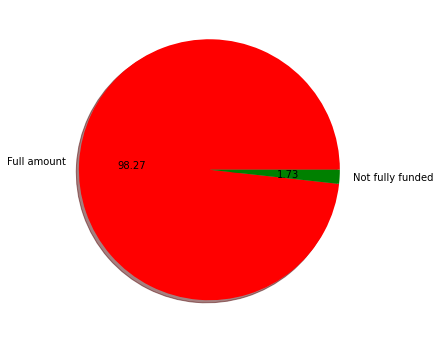

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['Full amount','Not fully funded'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

In [22]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0,0.005
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0,0.000
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0,0.000
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0,0.000
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0,0.000


In [23]:
def clear_percent (row):
    try:
        d = float(row['int_rate'][:-1])/100.
    except:
        d = None
    return d

df['int_rate_clean'] = df.apply (lambda row: clear_percent(row),axis=1)

In [24]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
print('Values of the variable term: ' + str(df['term'].unique()))

Values of the variable term: [' 36 months' ' 60 months']


In [26]:
def clear_term (row):
    try:
        if row['term']==' 36 months':
            d = 1
        else:
            if row['term']==' 60 months':
                d = 2
            else:
                if np.isnan(row['term']):
                    d = None
                else:
                    print('WRONG')
                    print(row['term'])
    except:
        print('EXCEPT')
        d = None
    return d

df['term_clean'] = df.apply (lambda row: clear_term(row),axis=1)
    

In [27]:
print('Values for employment length: ' + str(df['emp_length'].unique()))

Values for employment length: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [28]:
#We use dictionary mapping as a switch 
def clean_emp_length(argument):
    switcher = {
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10,
        '< 1 year': 0,
        'n/a':None,
    }
    try:
        d = switcher[argument['emp_length']]    
    except:
        d = None
    return d

df['emp_length_clean'] = df.apply (lambda row: clean_emp_length(row),axis=1)


In [29]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,int_rate_clean,term_clean,emp_length_clean
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,27.65,0.0,NaN,9.0,0.005,None,1,10.0
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,1.00,0.0,NaN,4.0,0.000,None,2,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,8.72,0.0,NaN,10.0,0.000,None,1,10.0
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,20.00,0.0,35.0,37.0,0.000,None,1,10.0
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,17.94,0.0,38.0,38.0,0.000,None,2,1.0


In [30]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [31]:
from sklearn.feature_extraction import DictVectorizer

comb_dict = df[['home_ownership']].to_dict(orient='records')
vec = DictVectorizer()
home = 2*vec.fit_transform(comb_dict).toarray()-1
home[:5]

array([[-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1.,  1.]])

In [32]:
df_vector = pd.DataFrame(home[:,1:])
vector_columns = vec.get_feature_names_out()
df_vector.columns = vector_columns[1:]
df_vector.index = df.index
df_vector.head()

,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,-1.0,-1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,1.0
2,-1.0,-1.0,-1.0,-1.0,1.0
3,-1.0,-1.0,-1.0,-1.0,1.0
4,-1.0,-1.0,-1.0,-1.0,1.0


In [33]:
#Join data
df = df.join(df_vector)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,...,total_acc,targets,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000,5000,4975.0,36 months,10.65,162.87,10+ years,RENT,24000.0,27.65,...,9.0,0.005,None,1,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500,2500,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,1.00,...,4.0,0.000,None,2,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400,2400,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,8.72,...,10.0,0.000,None,1,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000,10000,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,20.00,...,37.0,0.000,None,1,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000,3000,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,17.94,...,38.0,0.000,None,2,1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [34]:
#Drop processed columns
df = df.drop(['term','int_rate','emp_length','home_ownership'],axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,total_acc,targets,int_rate_clean,term_clean,emp_length_clean,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT
0,5000,5000,4975.0,162.87,24000.0,27.65,0.0,NaN,9.0,0.005,None,1,10.0,-1.0,-1.0,-1.0,-1.0,1.0
1,2500,2500,2500.0,59.83,30000.0,1.00,0.0,NaN,4.0,0.000,None,2,0.0,-1.0,-1.0,-1.0,-1.0,1.0
2,2400,2400,2400.0,84.33,12252.0,8.72,0.0,NaN,10.0,0.000,None,1,10.0,-1.0,-1.0,-1.0,-1.0,1.0
3,10000,10000,10000.0,339.31,49200.0,20.00,0.0,35.0,37.0,0.000,None,1,10.0,-1.0,-1.0,-1.0,-1.0,1.0
4,3000,3000,3000.0,67.79,80000.0,17.94,0.0,38.0,38.0,0.000,None,2,1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [35]:
#Drop the funded ammount
df=df.drop(['funded_amnt_inv'],axis=1)

In [36]:
#Declare targets
y = df['targets'].values>0.05
print('Undefined values:' + str(np.sum(np.where(np.isnan(y),1,0))))
x=df.drop(['targets'],axis=1).values
idx_rmv = np.where(np.isnan(y))[0]
y = np.delete(y,idx_rmv)
x = np.delete(x,idx_rmv,axis=0)
print(y.shape,x.shape)

Undefined values:0
(466285,) (466285, 16)


array([     0,      0,      0,      4,      0,     29, 250351,     29,
       466285,      0,  21008,      0,      0,      0,      0,      0])

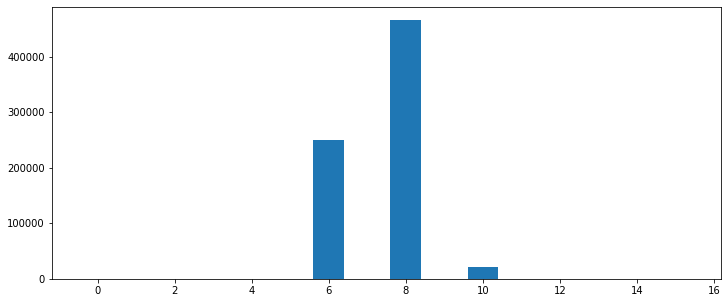

In [37]:
#Check what is going on in the data NaN
nan_feats=np.sum(np.where(pd.isnull(x),1,0),axis=0)
plt.bar(np.arange(len(nan_feats)),nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_feats

In [38]:
#Drop feature 6, too much NaN
print(col_names[6])
x=np.hstack((x[:,:6],x[:,7:]))


term


array([     0,      0,      0,      4,      0,     29,     29, 466285,
            0,  21008,      0,      0,      0,      0,      0])

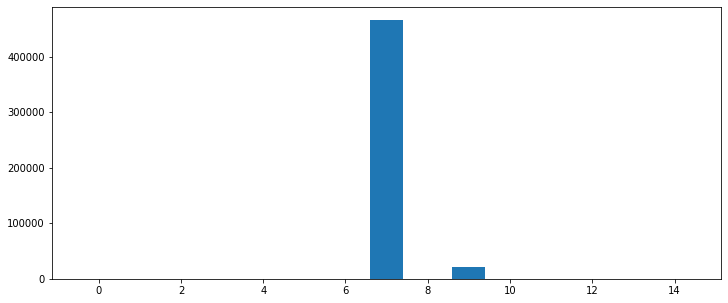

In [39]:
x.shape
#Check now
nan_feats=np.sum(np.where(pd.isnull(x),1,0),axis=0)
plt.bar(np.arange(len(nan_feats)),nan_feats)
fig = plt.gcf()
fig.set_size_inches((12,5))
nan_feats

In [40]:
#Check records
nan_records=np.sum(np.where(pd.isnull(x),1,0),axis=1)
np.histogram(nan_records)

(array([445248,      0,      0,  21008,      0,      0,     25,      0,
             0,      4]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]))

In [41]:
print(len(nan_records),len(y))
idx_rmv = np.where(nan_records>0)[0]
y = np.delete(y,idx_rmv)
x = np.delete(x,idx_rmv,axis=0)
print(y.shape,x.shape)

466285 466285
(0,) (0, 15)
